***Assignment - to apply KNN algo on BoW, TfIDF, W2V, TfIdf-W2V vectorizers***

In [1]:
#importing general purpose libraries:
import psutil
import os
import sys
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
#importing EDA libraries and maths libraries
import pandas as pd
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from mlxtend.plotting import plot_decision_regions #for decision surface:

In [2]:
#checking current memory utilization:
psutil.virtual_memory()

svmem(total=25286242304, available=24301436928, percent=3.9, used=640028672, free=23920914432, active=574001152, inactive=581865472, buffers=41668608, cached=683630592, shared=11259904, slab=56930304)

In [3]:
#importing the preprocessed file in database.

import sqlite3
con = sqlite3.connect('/home/jalesh_j/Data_Preprocessing/cleaned.sqlite')
df = pd.read_sql_query("""select * from cleandf""", con)

In [4]:
df.columns

Index(['index', 'Score', 'Time', 'Text', 'Summary', 'cleanedtext',
       'numeric_score'],
      dtype='object')

In [5]:
#tfidf, w2v, tfidf-w2v cleaned text
df['Text'].head(3)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
Name: Text, dtype: object

In [6]:
#bow cleaned text
df['cleanedtext'].head(2)

0    bought sever vital can dog food product found ...
1    product arriv label jumbo salt peanut peanut a...
Name: cleanedtext, dtype: object

In [7]:
len(df)

364171

***BoW***

In [8]:
#sorting the datframe based on time:
df = df.sort_values('Time', ascending=True)
df['Time'].head(8)

117924    939340800
117901    940809600
298792    944092800
169281    944438400
298791    946857600
169342    947376000
169267    948240000
63317     948672000
Name: Time, dtype: int64

In [8]:
#splitting the dataset into training and test
d = df.head(1000)
x = d['cleanedtext'].head(1000000)
xtest = d['cleanedtext'][50000:60000]
ytr = d['numeric_score'].head(50000).apply(lambda x: int(0) if int(x) <3 else int(1)
y_test = df['numeric_score'][50000:60000].apply(lambda x: 0 if int(x) <3 else 1)

In [25]:
d = df.head(1000)
x = d['cleanedtext']
y = d['numeric_score'].head(1000).apply(lambda x: int(0) if x < 3 else int(1))

In [26]:
#train test split:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xt, xtest, yt, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)
xtr, xcv, ytr, ycv = train_test_split(xt, yt, test_size=0.2, shuffle=False)

***Instantiating Bow object***

In [27]:
%time
#importing Bow library:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1, 2))
xtr = bow.fit_transform(xtr)
xcv = bow.transform(xcv)
xtest = bow.transform(xtest)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.44 µs


***Standarding data***

In [28]:
#standardizing the data:
sc = StandardScaler(with_mean=False)
xtr = sc.fit_transform(xtr)
xcv = sc.transform(xcv)
xtest = sc.transform(xtest)
print(x.shape)
print(xcv.shape)
print(xtest.shape)

(1000,)
(160, 34988)
(200, 34988)


/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jalesh_j/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
print(xtr.shape)
print(ytr.shape)
print(xcv.shape)
print(ycv.shape)
print(xtest.shape)
print(ytest.shape)

(640, 34988)
(640,)
(160, 34988)
(160,)
(200, 34988)
(200,)


***Importing performance metric libraries***

In [22]:
#importing KNN relevant libraries:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



#importing performance libraries:

from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

***KNN on BoW***

In [15]:
#checking memory usage:
psutil.virtual_memory()

svmem(total=25286242304, available=23845154816, percent=5.7, used=1096294400, free=23464493056, active=1328168960, inactive=282439680, buffers=41807872, cached=683646976, shared=11259904, slab=56942592)

In [30]:
%%time

knn_dict = {}
auc_dict = {}
for i in range(3, 50, 4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='uniform',metric_params='auc')
    knn.fit(xtr, ytr)
    y_pred = knn.predict(xcv)
    knn_dict[i] = y_pred
    fpr, tpr, thresholds = metrics.roc_curve(ycv, y_pred, pos_label=2)
    auc_dict[i] = metrics.auc(fpr, tpr)
    
    
    

AttributeError: 'str' object has no attribute 'copy'

In [17]:
type(xtest)

scipy.sparse.csr.csr_matrix

In [14]:
%%time

#applying KNN:
knn_dict = {}
for i in range(3,50,4):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='distance',metric='euclidean')
    cv_score = cross_val_score(knn, x, y, cv=10,scoring='roc_auc')
    knn_dict[i] = cv_score.mean()
    

CPU times: user 9min 44s, sys: 3min 8s, total: 12min 53s
Wall time: 12min 53s


***CV error***

In [15]:
cv_score = np.round(cv_score , 2)
cverror = [(1 - x) * 100 for x in cv_score]
print(cverror)


array([0.77541799, 0.79178033, 0.80221956, 0.77322104, 0.77939299,
       0.79671788, 0.79084931, 0.80005499, 0.78755817, 0.7888444 ])

{1: 0.5253846153846154,
 5: 0.5181177884615384,
 9: 0.5175544871794873,
 13: 0.6078878205128205,
 17: 0.5608557692307692,
 21: 0.5436666666666667,
 25: 0.6350496794871794,
 29: 0.6319871794871795,
 33: 0.6482259615384615,
 37: 0.6412980769230769,
 41: 0.6160064102564102,
 45: 0.5837580128205129,
 49: 0.6050416666666666}

In [15]:
%%time

#applying KNN:
knn_dict = {}
for i in range(1,50,4):
    a, b = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                          n_features=20,n_clusters_per_class=1, n_samples=100, random_state=10, shuffle=False)
                           
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='brute', weights='uniform',metric='euclidean')
    cv_score = cross_val_score(knn, x, y, cv=10,scoring='roc_auc')
    knn_dict[i] = np.round(cv_score.mean(),2)

CPU times: user 11.6 s, sys: 6.02 s, total: 17.6 s
Wall time: 4.42 s


In [16]:
knn_dict

{1: 0.53,
 5: 0.52,
 9: 0.55,
 13: 0.55,
 17: 0.57,
 21: 0.53,
 25: 0.56,
 29: 0.57,
 33: 0.56,
 37: 0.59,
 41: 0.58,
 45: 0.53,
 49: 0.52}

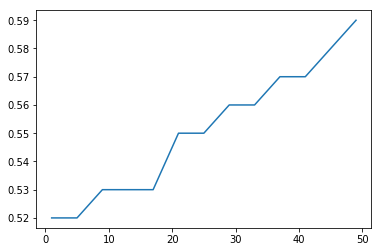

In [17]:
key = list(sorted(knn_dict.keys()))
value = list(sorted(knn_dict.values()))
plt.plot(key, value)

In [18]:
key

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49]

In [19]:
y.value_counts()

1    649
0     51
Name: numeric_score, dtype: int64

In [20]:
y_test.value_counts()

1    457
0     43
Name: numeric_score, dtype: int64

In [21]:
a = 2

In [22]:
#!pip3 install imblearn

***SMOTE OVERSAMPLING***

In [27]:
from imblearn import over_sampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [28]:
a, b = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                          n_features=20,n_clusters_per_class=1, n_samples=1000, random_state=10, shuffle=False)
                           

In [30]:
print('Original dataset shape %s' % Counter(b))
sm = SMOTE(random_state=42)
a_res, b_res = sm.fit_resample(a, b)
print('Resampled dataset shape %s' % Counter(b_res))


Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [31]:
len(y_test) / len(y)

0.7142857142857143

In [34]:
x.shape

(700, 5746)

In [35]:
xtest.shape

(500, 5746)

In [37]:
xcv.shape

(300, 5746)

In [8]:
%xdel df